In [1]:
#Import the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#LOAD THE DATA
#Read the .txt file and create a dataframe
data = pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt", sep=';',
                   parse_dates={'datetime': ['Date', 'Time']},dayfirst=True,
                   infer_datetime_format=True,
                   na_values='?',
                   low_memory=False)




<ipython-input-2-3f7ff943a24f>:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt", sep=';',
<ipython-input-2-3f7ff943a24f>:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt", sep=';',


In [3]:
#Data Cleaning
#Handling the null values by filling it with mean of the respective columns

data.isnull().mean()

,0
datetime,0.000000
Global_active_power,0.012518
Global_reactive_power,0.012518
Voltage,0.012518
Global_intensity,0.012518
Sub_metering_1,0.012518
Sub_metering_2,0.012518
Sub_metering_3,0.012518


In [4]:
data.fillna(data.mean(),inplace=True)

In [5]:
data.isnull().mean()

,0
datetime,0.0
Global_active_power,0.0
Global_reactive_power,0.0
Voltage,0.0
Global_intensity,0.0
Sub_metering_1,0.0
Sub_metering_2,0.0
Sub_metering_3,0.0


In [6]:
# SELECT ONLY NUMERIC COLUMNS
import numpy as np

number_columns=data.select_dtypes(include = [np.number]).columns
number_columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [7]:
# Check for negative values in numerical columns
negative_values = data[number_columns] < 0
print("\nNegative values in numerical columns:\n", negative_values.sum())


Negative values in numerical columns:
 Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


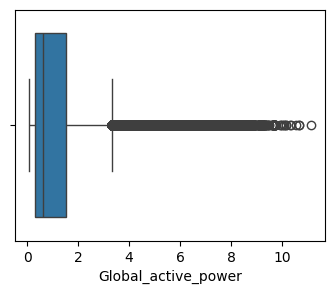

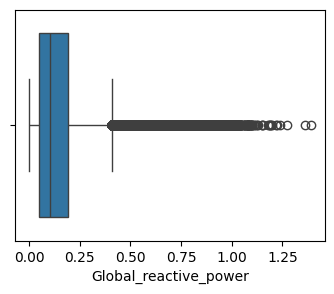

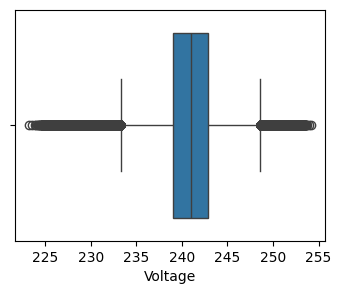

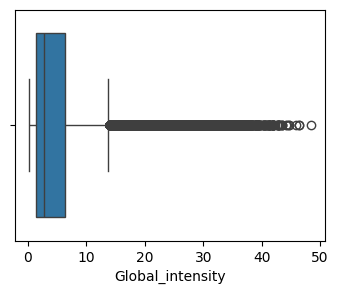

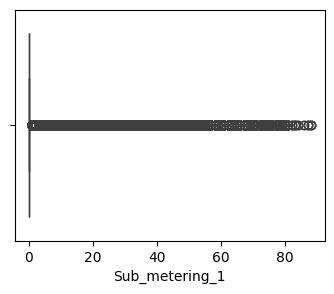

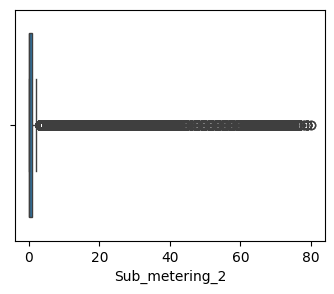

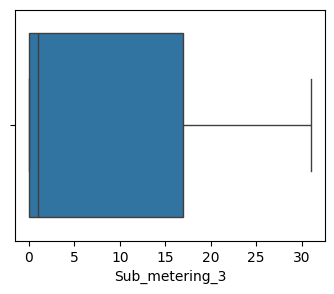

In [8]:
#FIND THE OUTLIERS
for i in number_columns:
   plt.figure(figsize=(4, 3))
   sns.boxplot(x=data[i])
   plt.show()

In [9]:
#FIND THE SKEWNESS VALUES
data.skew(numeric_only=True)

,0
Global_active_power,1.797520
Global_reactive_power,1.269888
Voltage,-0.328729
Global_intensity,1.860784
Sub_metering_1,5.982102
Sub_metering_2,7.135356
Sub_metering_3,0.729267


In [10]:
#The Interquartile Range (IQR) method identifies anomalies by calculating the range between the first quartile (Q1) and the third quartile (Q3).
# Calculate IQR

for i in number_columns:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1
  LB=Q1 - 1.5 * IQR
  UB=Q3 + 1.5 * IQR
  data.loc[data[i]<LB,i]=LB
  data.loc[data[i]>UB,i]=UB

In [ ]:
#CHECK THE OUTLIERS AFTER IQR capping

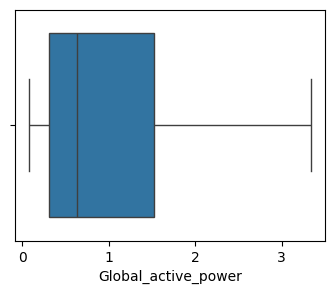

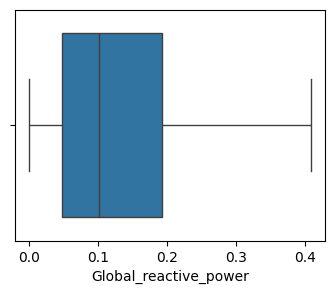

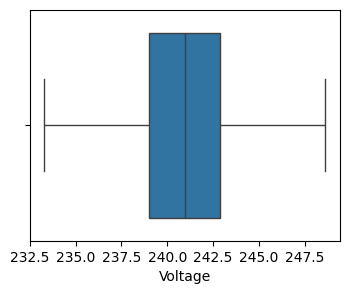

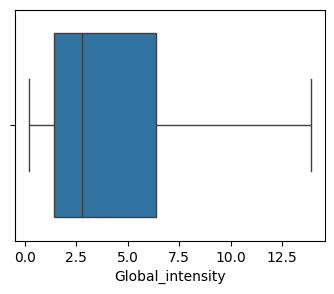

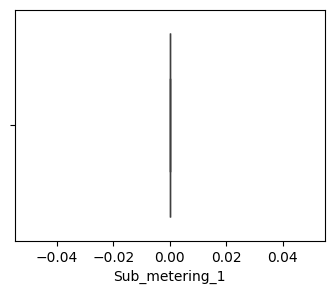

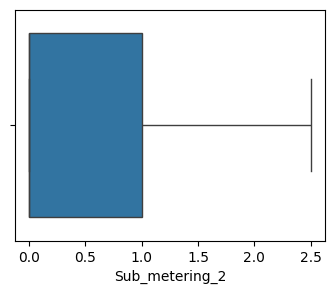

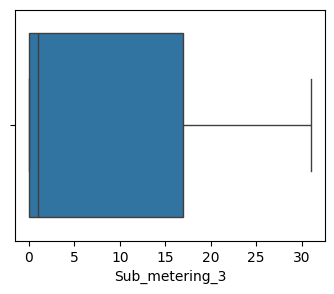

In [11]:
for i in number_columns:
   plt.figure(figsize=(4, 3))
   sns.boxplot(x=data[i])
   plt.show()

In [12]:
data.skew(numeric_only=True)
#the skewness after IQR CAPPING

,0
Global_active_power,1.051001
Global_reactive_power,0.817568
Voltage,-0.183980
Global_intensity,1.060911
Sub_metering_1,0.000000
Sub_metering_2,1.473784
Sub_metering_3,0.729267


In [ ]:
""" before IQR capping,skewness was


Global_active_power      1.797520
Global_reactive_power    1.269888
Voltage                 -0.328729
Global_intensity         1.860784
Sub_metering_1           5.982102
Sub_metering_2           7.135356
Sub_metering_3           0.729267
dtype: float64


"""

In [ ]:
#FINDING THE ANOMALY FOR THE GLOBAL ACTIVE POWER

In [13]:
data['anomaly'] = data['Global_active_power'].apply(lambda x: x < LB or x > UB)

In [14]:
data

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,anomaly
0,2006-12-16 17:24:00,3.335,0.408,234.84,13.9,0.0,1.0,17.0,False
1,2006-12-16 17:25:00,3.335,0.408,233.63,13.9,0.0,1.0,16.0,False
2,2006-12-16 17:26:00,3.335,0.408,233.29,13.9,0.0,2.0,17.0,False
3,2006-12-16 17:27:00,3.335,0.408,233.74,13.9,0.0,1.0,17.0,False
4,2006-12-16 17:28:00,3.335,0.408,235.68,13.9,0.0,1.0,17.0,False
...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,False
2075255,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,False
2075256,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,False
2075257,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,False


In [15]:
data.loc[data['anomaly']==True,:]

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,anomaly


In [ ]:
#It is clear that there is no anomaly in the Global_active_power column

In [ ]:
# Create additional features such as date,daily average

In [16]:
data.insert(1,'Date',None)
data['Date']=data['datetime'].dt.date
data['Date']=pd.to_datetime(data['Date'])
data.head()

,datetime,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,anomaly
0,2006-12-16 17:24:00,2006-12-16,3.335,0.408,234.84,13.9,0.0,1.0,17.0,False
1,2006-12-16 17:25:00,2006-12-16,3.335,0.408,233.63,13.9,0.0,1.0,16.0,False
2,2006-12-16 17:26:00,2006-12-16,3.335,0.408,233.29,13.9,0.0,2.0,17.0,False
3,2006-12-16 17:27:00,2006-12-16,3.335,0.408,233.74,13.9,0.0,1.0,17.0,False
4,2006-12-16 17:28:00,2006-12-16,3.335,0.408,235.68,13.9,0.0,1.0,17.0,False


In [17]:
Daily_Average=data.groupby('Date')['Global_active_power'].mean()
Daily_Average=Daily_Average.reset_index()
Daily_Average.columns=['Date','Daily_average']
merged_data=pd.merge(data,Daily_Average,on='Date',how='inner')
merged_data

,datetime,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,anomaly,Daily_average
0,2006-12-16 17:24:00,2006-12-16,3.335,0.408,234.84,13.9,0.0,1.0,17.0,False,2.843134
1,2006-12-16 17:25:00,2006-12-16,3.335,0.408,233.63,13.9,0.0,1.0,16.0,False,2.843134
2,2006-12-16 17:26:00,2006-12-16,3.335,0.408,233.29,13.9,0.0,2.0,17.0,False,2.843134
3,2006-12-16 17:27:00,2006-12-16,3.335,0.408,233.74,13.9,0.0,1.0,17.0,False,2.843134
4,2006-12-16 17:28:00,2006-12-16,3.335,0.408,235.68,13.9,0.0,1.0,17.0,False,2.843134
...,...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,2010-11-26,0.946,0.000,240.43,4.0,0.0,0.0,0.0,False,1.162577
2075255,2010-11-26 20:59:00,2010-11-26,0.944,0.000,240.00,4.0,0.0,0.0,0.0,False,1.162577
2075256,2010-11-26 21:00:00,2010-11-26,0.938,0.000,239.82,3.8,0.0,0.0,0.0,False,1.162577
2075257,2010-11-26 21:01:00,2010-11-26,0.934,0.000,239.70,3.8,0.0,0.0,0.0,False,1.162577


In [18]:
# Create new features: day of the week, month,day,year and Hour
merged_data['Year']=merged_data['datetime'].dt.year
merged_data['Month']=merged_data['datetime'].dt.month
merged_data['Day']=merged_data['datetime'].dt.day
merged_data['Day_of_Week']=merged_data['datetime'].dt.dayofweek
merged_data['Hour']=merged_data['datetime'].dt.hour

merged_data

,datetime,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,anomaly,Daily_average,Year,Month,Day,Day_of_Week,Hour
0,2006-12-16 17:24:00,2006-12-16,3.335,0.408,234.84,13.9,0.0,1.0,17.0,False,2.843134,2006,12,16,5,17
1,2006-12-16 17:25:00,2006-12-16,3.335,0.408,233.63,13.9,0.0,1.0,16.0,False,2.843134,2006,12,16,5,17
2,2006-12-16 17:26:00,2006-12-16,3.335,0.408,233.29,13.9,0.0,2.0,17.0,False,2.843134,2006,12,16,5,17
3,2006-12-16 17:27:00,2006-12-16,3.335,0.408,233.74,13.9,0.0,1.0,17.0,False,2.843134,2006,12,16,5,17
4,2006-12-16 17:28:00,2006-12-16,3.335,0.408,235.68,13.9,0.0,1.0,17.0,False,2.843134,2006,12,16,5,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,2010-11-26,0.946,0.000,240.43,4.0,0.0,0.0,0.0,False,1.162577,2010,11,26,4,20
2075255,2010-11-26 20:59:00,2010-11-26,0.944,0.000,240.00,4.0,0.0,0.0,0.0,False,1.162577,2010,11,26,4,20
2075256,2010-11-26 21:00:00,2010-11-26,0.938,0.000,239.82,3.8,0.0,0.0,0.0,False,1.162577,2010,11,26,4,21
2075257,2010-11-26 21:01:00,2010-11-26,0.934,0.000,239.70,3.8,0.0,0.0,0.0,False,1.162577,2010,11,26,4,21


In [19]:
# Create a feature for season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

merged_data['Season'] = merged_data['Month'].apply(get_season)

# Display the first few rows to verify the new features
merged_data.head()

,datetime,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,anomaly,Daily_average,Year,Month,Day,Day_of_Week,Hour,Season
0,2006-12-16 17:24:00,2006-12-16,3.335,0.408,234.84,13.9,0.0,1.0,17.0,False,2.843134,2006,12,16,5,17,Winter
1,2006-12-16 17:25:00,2006-12-16,3.335,0.408,233.63,13.9,0.0,1.0,16.0,False,2.843134,2006,12,16,5,17,Winter
2,2006-12-16 17:26:00,2006-12-16,3.335,0.408,233.29,13.9,0.0,2.0,17.0,False,2.843134,2006,12,16,5,17,Winter
3,2006-12-16 17:27:00,2006-12-16,3.335,0.408,233.74,13.9,0.0,1.0,17.0,False,2.843134,2006,12,16,5,17,Winter
4,2006-12-16 17:28:00,2006-12-16,3.335,0.408,235.68,13.9,0.0,1.0,17.0,False,2.843134,2006,12,16,5,17,Winter


In [ ]:
#FIND THE ROLLING MEAN FOR THREE HOURS

In [20]:
merged_data["Rolling_mean_3hr"]=merged_data['Global_active_power'].rolling(window=10800).mean()

In [21]:
merged_data.dropna(inplace=True)

In [22]:
merged_data

,datetime,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,anomaly,Daily_average,Year,Month,Day,Day_of_Week,Hour,Season,Rolling_mean_3hr
10799,2006-12-24 05:23:00,2006-12-24,1.666,0.124,246.05,8.0,0.0,0.0,0.0,False,1.654857,2006,12,24,6,5,Winter,1.720782
10800,2006-12-24 05:24:00,2006-12-24,0.920,0.136,247.30,5.4,0.0,0.0,0.0,False,1.654857,2006,12,24,6,5,Winter,1.720558
10801,2006-12-24 05:25:00,2006-12-24,2.392,0.000,245.63,9.6,0.0,0.0,0.0,False,1.654857,2006,12,24,6,5,Winter,1.720471
10802,2006-12-24 05:26:00,2006-12-24,1.202,0.000,247.05,6.4,0.0,0.0,0.0,False,1.654857,2006,12,24,6,5,Winter,1.720274
10803,2006-12-24 05:27:00,2006-12-24,1.394,0.000,247.60,7.0,0.0,0.0,0.0,False,1.654857,2006,12,24,6,5,Winter,1.720094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,2010-11-26,0.946,0.000,240.43,4.0,0.0,0.0,0.0,False,1.162577,2010,11,26,4,20,Fall,1.132209
2075255,2010-11-26 20:59:00,2010-11-26,0.944,0.000,240.00,4.0,0.0,0.0,0.0,False,1.162577,2010,11,26,4,20,Fall,1.132168
2075256,2010-11-26 21:00:00,2010-11-26,0.938,0.000,239.82,3.8,0.0,0.0,0.0,False,1.162577,2010,11,26,4,21,Fall,1.132126
2075257,2010-11-26 21:01:00,2010-11-26,0.934,0.000,239.70,3.8,0.0,0.0,0.0,False,1.162577,2010,11,26,4,21,Fall,1.132083


In [23]:
#Separating the INDEPENDENT AND DEPENDENT COLUMNS
X=merged_data.drop(['Global_active_power','Date','datetime','anomaly','Year','Month','Day','Day_of_Week','Hour','Season'],axis=1)

y=merged_data['Global_active_power']



In [24]:
#The FEATURE COLUMNS OR INDEPENDENT COLUMNS
X

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Daily_average,Rolling_mean_3hr
10799,0.124,246.05,8.0,0.0,0.0,0.0,1.654857,1.720782
10800,0.136,247.30,5.4,0.0,0.0,0.0,1.654857,1.720558
10801,0.000,245.63,9.6,0.0,0.0,0.0,1.654857,1.720471
10802,0.000,247.05,6.4,0.0,0.0,0.0,1.654857,1.720274
10803,0.000,247.60,7.0,0.0,0.0,0.0,1.654857,1.720094
...,...,...,...,...,...,...,...,...
2075254,0.000,240.43,4.0,0.0,0.0,0.0,1.162577,1.132209
2075255,0.000,240.00,4.0,0.0,0.0,0.0,1.162577,1.132168
2075256,0.000,239.82,3.8,0.0,0.0,0.0,1.162577,1.132126
2075257,0.000,239.70,3.8,0.0,0.0,0.0,1.162577,1.132083


In [25]:
#DEPENDENT COLUMN
y

,Global_active_power
10799,1.666
10800,0.920
10801,2.392
10802,1.202
10803,1.394
...,...
2075254,0.946
2075255,0.944
2075256,0.938
2075257,0.934


In [26]:
#Scale the data for better model performance
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)



In [27]:
X_scaled

array([[ 0.02111933,  1.66933622,  0.95370622, ..., -0.76936433,
         1.67548232,  2.34045272],
       [ 0.13521467,  2.07157132,  0.2622052 , ..., -0.76936433,
         1.67548232,  2.33967764],
       [-1.15786586,  1.53418522,  1.37924531, ..., -0.76936433,
         1.67548232,  2.33937499],
       ...,
       [-1.15786586, -0.33540354, -0.16333388, ..., -0.76936433,
         0.32536049,  0.30007095],
       [-1.15786586, -0.37401811, -0.16333388, ..., -0.76936433,
         0.32536049,  0.29992204],
       [-1.15786586, -0.42228632, -0.16333388, ..., -0.76936433,
         0.32536049,  0.29976606]])

In [29]:
import torch
import torch.nn as nn
import torch.optim as opt
from torch.utils.data import TensorDataset,DataLoader


In [ ]:
#Convert the data into Tensor array format

In [30]:
X_ten=torch.tensor(X_scaled,dtype=torch.float32)
y_ten=torch.tensor(y.values,dtype=torch.float32)

In [31]:
#DISPLAY X_ten
X_ten

tensor([[ 0.0211,  1.6693,  0.9537,  ..., -0.7694,  1.6755,  2.3405],
        [ 0.1352,  2.0716,  0.2622,  ..., -0.7694,  1.6755,  2.3397],
        [-1.1579,  1.5342,  1.3792,  ..., -0.7694,  1.6755,  2.3394],
        ...,
        [-1.1579, -0.3354, -0.1633,  ..., -0.7694,  0.3254,  0.3001],
        [-1.1579, -0.3740, -0.1633,  ..., -0.7694,  0.3254,  0.2999],
        [-1.1579, -0.4223, -0.1633,  ..., -0.7694,  0.3254,  0.2998]])

In [32]:
#CHECKING THE Shape OF X_ten
X_ten.shape

torch.Size([2064460, 8])

In [33]:
#DISPLAY y_ten
y_ten

tensor([1.6660, 0.9200, 2.3920,  ..., 0.9380, 0.9340, 0.9320])

In [34]:
#CHECKING THE Shape OF y_ten
y_ten.shape

torch.Size([2064460])

In [35]:
#CREATE A DATASET
train_dataset=TensorDataset(X_ten,y_ten)
#DATA LOADER
loaded_data=DataLoader(dataset=train_dataset,batch_size=40,shuffle=True)

In [36]:
for i in loaded_data:
    print(i)
    break

[tensor([[-0.2831, -0.3193,  0.3686,  0.0000,  0.7570,  1.3783,  0.1331,  0.7572],
        [-0.6825, -0.6508,  0.2622,  0.0000, -0.6014,  1.3783,  0.5717,  0.5659],
        [ 0.0592, -0.3354,  1.8580,  0.0000, -0.6014,  1.3783, -0.2565,  1.3860],
        [ 2.0939,  0.9067,  1.0069,  0.0000,  0.7570,  1.3783, -0.3007,  0.2562],
        [ 0.9909,  0.8842, -0.6953,  0.0000,  0.7570, -0.6500, -0.4819, -0.1222],
        [ 1.5044,  0.1923,  0.7941,  0.0000, -0.6014, -0.7694,  0.4089,  1.0106],
        [-0.5113,  0.6525, -0.4293,  0.0000, -0.6014, -0.7694, -0.5985,  0.3702],
        [-1.1579,  0.3178, -0.9080,  0.0000, -0.6014, -0.6500,  0.8134, -0.2184],
        [ 0.5345,  0.4176,  0.8473,  0.0000, -0.6014,  1.4977,  1.1651, -0.0941],
        [-0.3782,  1.7820, -0.8548,  0.0000,  0.7570, -0.7694, -0.1580, -0.3745],
        [-1.1579,  0.9550,  0.4218,  0.0000, -0.6014,  1.3783,  1.1850,  1.4358],
        [-1.1579,  0.7909, -1.0676,  0.0000, -0.6014, -0.7694, -1.5774, -0.7832],
        [ 2.721

In [37]:
#BUILDING THE MODEL
model_reg = nn.Sequential(
    nn.Linear(8,50),
    nn.ReLU(),
    nn.Dropout(0.3),

    nn.Linear(50, 40),
    nn.ReLU(),
    nn.Dropout(0.3),

    nn.Linear(40,30),
    nn.ReLU(),
    #nn.Dropout(0.3),

    nn.Linear(30,25),
    nn.LeakyReLU(0.2),
    nn.Dropout(0.3),

    nn.Linear(25,20),
    nn.ReLU(),
    nn.Dropout(0.3),

    nn.Linear(20,15),
    nn.LeakyReLU(0.2),
    nn.Dropout(0.3),

    nn.Linear(15,5),
    nn.ReLU(),
    nn.Dropout(0.3),

    nn.Linear(5,1)
)

In [38]:
#Model layer architecture
model_reg

Sequential(
  (0): Linear(in_features=8, out_features=50, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=50, out_features=40, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=40, out_features=30, bias=True)
  (7): ReLU()
  (8): Linear(in_features=30, out_features=25, bias=True)
  (9): LeakyReLU(negative_slope=0.2)
  (10): Dropout(p=0.3, inplace=False)
  (11): Linear(in_features=25, out_features=20, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.3, inplace=False)
  (14): Linear(in_features=20, out_features=15, bias=True)
  (15): LeakyReLU(negative_slope=0.2)
  (16): Dropout(p=0.3, inplace=False)
  (17): Linear(in_features=15, out_features=5, bias=True)
  (18): ReLU()
  (19): Dropout(p=0.3, inplace=False)
  (20): Linear(in_features=5, out_features=1, bias=True)
)

In [39]:
#Checking the parameters of the model..The weights of the model are displayed

for i in model_reg.named_parameters():
    print(i)

('0.weight', Parameter containing:
tensor([[ 0.2936, -0.0559, -0.0260, -0.0290, -0.1070,  0.3361,  0.1400,  0.1125],
        [-0.2689,  0.1341,  0.3155, -0.1837,  0.0896,  0.0304, -0.1286, -0.2434],
        [ 0.0835,  0.0788, -0.1702,  0.3379, -0.2965,  0.3413,  0.1096, -0.2805],
        [-0.2144, -0.0343,  0.2059,  0.0519,  0.3149,  0.1480, -0.1288, -0.3312],
        [ 0.0113,  0.2732, -0.2820, -0.2481, -0.0430,  0.1916, -0.0415,  0.0512],
        [-0.1315,  0.2583, -0.2353,  0.1300, -0.0549, -0.2965,  0.2707, -0.2426],
        [-0.2928, -0.1599,  0.2270, -0.0886, -0.2602, -0.1148,  0.1316, -0.0781],
        [-0.0728,  0.0227,  0.2817,  0.0920, -0.3427,  0.0225,  0.2942, -0.2304],
        [ 0.2238, -0.1596,  0.0018,  0.0074,  0.0289, -0.2790, -0.1711,  0.0654],
        [-0.2548,  0.2208, -0.1942, -0.0086,  0.2660,  0.1063,  0.1045, -0.2949],
        [-0.3366,  0.1059, -0.0128,  0.1403, -0.2098, -0.1183,  0.3084,  0.2700],
        [-0.3388,  0.2019,  0.2980, -0.3291,  0.3407,  0.2180, 

In [40]:
#ADDING OPTIMISER AND LOSS FUNCTIONS
mse=nn.MSELoss()
optim=opt.SGD(model_reg.parameters(),lr=0.0001)

In [41]:
#Training the model
epoch=15
for i in range(0,epoch):
    for X_ten1,y_ten1 in loaded_data:
        optim.zero_grad()
        model_op=model_reg(X_ten1)
        loss=mse(model_op,y_ten1.view(-1,1))
        loss.backward()
        optim.step()

    print(f"EPOCH IS {i}/{epoch}=======loss is {loss} ")

EPOCH IS 0/15=======loss is 0.845136284828186 
EPOCH IS 1/15=======loss is 0.995505154132843 
EPOCH IS 2/15=======loss is 1.4158656597137451 
EPOCH IS 3/15=======loss is 0.8425564765930176 
EPOCH IS 4/15=======loss is 0.8860265016555786 
EPOCH IS 5/15=======loss is 0.4670809209346771 
EPOCH IS 6/15=======loss is 0.7257524132728577 
EPOCH IS 7/15=======loss is 0.745953381061554 
EPOCH IS 8/15=======loss is 0.5413015484809875 
EPOCH IS 9/15=======loss is 0.33924591541290283 
EPOCH IS 10/15=======loss is 0.22954294085502625 
EPOCH IS 11/15=======loss is 0.3401106894016266 
EPOCH IS 12/15=======loss is 0.14487573504447937 
EPOCH IS 13/15=======loss is 0.11485709249973297 
EPOCH IS 14/15=======loss is 0.5072253346443176 


In [42]:
#PREDICTING THE OUTPUT OF THE MODEL BY PASSING THE INPUT DATASET IN TENSOR ARRAY FORM
pred=model_reg(X_ten)

In [43]:
#Printing the predicted output
pred

tensor([[1.7034],
        [0.9514],
        [2.2308],
        ...,
        [0.8830],
        [0.7773],
        [0.6611]], grad_fn=<AddmmBackward0>)

In [44]:
# Import the error metrics
from sklearn.metrics import root_mean_squared_error,mean_absolute_percentage_error,r2_score

In [45]:
#Find the root mean squared error
rmse=root_mean_squared_error(y_ten.detach().numpy(), pred.detach().numpy())



In [46]:
#Find the mean absolute percentage error
mape=mean_absolute_percentage_error(y_ten.detach().numpy(), pred.detach().numpy())

In [47]:
#Find the r2_score
r2_score_value=r2_score(y_ten.detach().numpy(), pred.detach().numpy())

In [48]:
#Display the error metrics
print("\nRoot mean squared error is  ",rmse)

print("\nMean absolute percentage error is  ",mape)
print("\n R2_score_value is  ",r2_score_value)


Root mean squared error is   0.5268588662147522

Mean absolute percentage error is   0.7015218138694763

 R2_score_value is   0.660955011844635


In [51]:
# Comparing with ground truth values
merged_data['Predicted_GAP'] = pred.detach().numpy()
merged_data[['Global_active_power','Predicted_GAP']]

,Global_active_power,Predicted_GAP
10799,1.666,1.703411
10800,0.920,0.951389
10801,2.392,2.230797
10802,1.202,1.829237
10803,1.394,1.301409
...,...,...
2075254,0.946,0.909023
2075255,0.944,0.577244
2075256,0.938,0.883017
2075257,0.934,0.777264


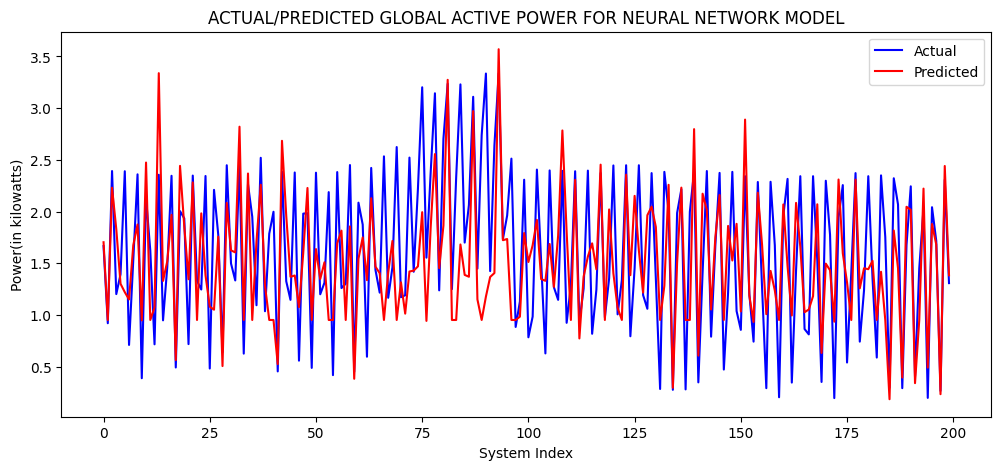

In [56]:
              # ACTUAL/PREDICTED GLOBAL ACTIVE POWER FOR NEURAL NETWORK MODEL
import numpy as np

plt.figure(figsize=(12,5))

  # Plot 'Actual' in blue and 'Predicted' in red

plt.plot(np.arange(0,200),y_ten.detach().numpy()[:200],label="Actual",color="Blue")
plt.plot(np.arange(0,200),pred.detach().numpy()[:200],label="Predicted",color="Red")

plt.title("ACTUAL/PREDICTED GLOBAL ACTIVE POWER FOR NEURAL NETWORK MODEL")
plt.xlabel("System Index")
plt.ylabel("Power(in kilowatts)")
plt.legend()
plt.show()